# Kansas Mesonet

In this example we will learn to download data from the Kansas mesonet. Data can be accessed through a URL (Uniform Resource Locator), which is also known as a web address. In this URL we are going to pass some parameters to specify the location, date, and interval of the data. For services that output their data in comma-separated values we can use the Pandas library.


**Note**:Some web services (e.g. openweathermap or dark sky) require a token (a user-specific key similar to a password) in order to use the service. Depending on the amount of data requested you might be able to use the service for free.


Representational State Transfer (REST). Find out more at <https://www.wikiwand.com/en/Representational_state_transfer>

Kansas mesonet REST API: http://mesonet.k-state.edu/rest/

Author: Andres Patrignani <br/>
Last updated: 14-Oct-2018



In [1]:
# Import packages
import pandas as pd

In [19]:
stn = 'Manhattan';
interval = 'hour'; # Options: day, hour, 5min;
start_time = '20200301000000';
end_time =   '20200301235900';

root = 'http://mesonet.k-state.edu/rest/stationdata/?'
url = root + 'stn=' + stn + '&int=' + interval + '&t_start=' + start_time + '&t_end=' + end_time;
print(url)

http://mesonet.k-state.edu/rest/stationdata/?stn=Manhattan&int=hour&t_start=20200301000000&t_end=20200301235900


In [20]:
# Let's inspect the first five rows
df = pd.read_csv(url)
df.head(3)


,TIMESTAMP,STATION,PRESSUREAVG,SLPAVG,TEMP2MAVG,TEMP10MAVG,RELHUM2MAVG,RELHUM10MAVG,VPDEFAVG,PRECIP,...,SOILPA20CM,SOILPA50CM,SOILVR5CM,SOILVR10CM,SOILVR20CM,SOILVR50CM,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,2020-03-01 00:00:00,Manhattan,96.82,100.67,14.36,14.91,31.28,29.45,1.12,0.0,...,1.8785,2.0797,1.2737,1.2756,1.3145,1.7303,0.40292,0.40970,0.41620,0.4949
1,2020-03-01 01:00:00,Manhattan,96.77,100.62,13.85,14.44,33.59,31.94,1.05,0.0,...,1.8785,2.0797,1.2730,1.2751,1.3146,1.7308,0.40283,0.40970,0.41621,0.4949
2,2020-03-01 02:00:00,Manhattan,96.72,100.57,13.38,13.94,35.67,34.12,0.99,0.0,...,1.8785,2.0797,1.2724,1.2749,1.3151,1.7315,0.40287,0.40927,0.41620,0.4949


In [9]:
print(df.shape)
print(df.size)


(7, 60)
420


In [10]:
# Let's also inspect the format of some variables
print(type(df.TIMESTAMP[0]))
print(type(df.PRESSUREAVG[0]))

<class 'str'>
<class 'numpy.float64'>


In [21]:
df['TIMESTAMP'] = pd.to_datetime(df["TIMESTAMP"], format='%Y-%m-%d %H:%M:%S')
df.head(5)


,TIMESTAMP,STATION,PRESSUREAVG,SLPAVG,TEMP2MAVG,TEMP10MAVG,RELHUM2MAVG,RELHUM10MAVG,VPDEFAVG,PRECIP,...,SOILPA20CM,SOILPA50CM,SOILVR5CM,SOILVR10CM,SOILVR20CM,SOILVR50CM,VWC5CM,VWC10CM,VWC20CM,VWC50CM
0,2020-03-01 00:00:00,Manhattan,96.82,100.67,14.36,14.91,31.28,29.45,1.12,0.0,...,1.8785,2.0797,1.2737,1.2756,1.3145,1.7303,0.40292,0.40970,0.41620,0.49490
1,2020-03-01 01:00:00,Manhattan,96.77,100.62,13.85,14.44,33.59,31.94,1.05,0.0,...,1.8785,2.0797,1.2730,1.2751,1.3146,1.7308,0.40283,0.40970,0.41621,0.49490
2,2020-03-01 02:00:00,Manhattan,96.72,100.57,13.38,13.94,35.67,34.12,0.99,0.0,...,1.8785,2.0797,1.2724,1.2749,1.3151,1.7315,0.40287,0.40927,0.41620,0.49490
3,2020-03-01 03:00:00,Manhattan,96.66,100.52,12.97,13.60,37.17,35.51,0.94,0.0,...,1.8785,2.0797,1.2716,1.2747,1.3152,1.7322,0.40274,0.40920,0.41620,0.49489
4,2020-03-01 04:00:00,Manhattan,96.64,100.50,11.78,12.53,40.96,39.16,0.82,0.0,...,1.8785,2.0797,1.2706,1.2742,1.3153,1.7326,0.40286,0.40920,0.41621,0.49488


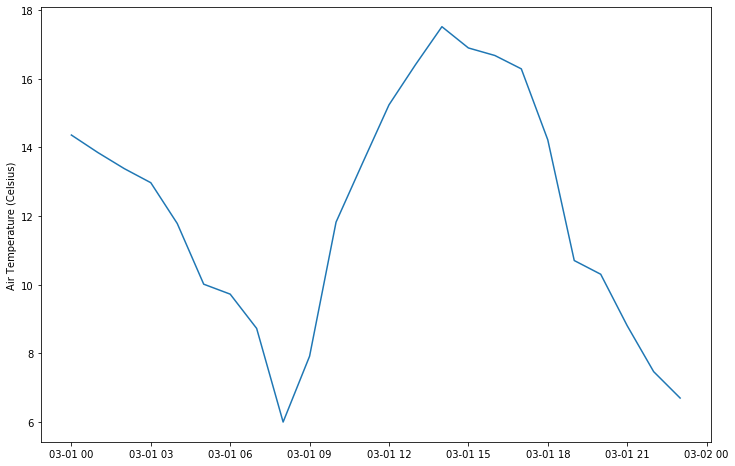

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(df["TIMESTAMP"], df["TEMP2MAVG"])
plt.ylabel('Air Temperature (Celsius)')
plt.show()
